In [3]:
import pandas as pd
import sklearn.manifold
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models.word2vec import LineSentence

In [3]:
data = LineSentence('train.txt')
model = Word2Vec(data, size=200, window=5, min_count=5, workers=8)

In [4]:
# Save the model for future use
# model.save('w2v_model') ## Done only once to avoid frequent saving of same model.

model = Word2Vec.load('cbow_model')

In [5]:
model.wv.most_similar('king')

[('mayor', 0.9121620059013367),
 ('dictator', 0.8749123811721802),
 ('taylor', 0.8602677583694458),
 ('prince', 0.8539236783981323),
 ('crown', 0.8433500528335571),
 ('senator', 0.8425443172454834),
 ('abdullah', 0.840832531452179),
 ('ali', 0.8380850553512573),
 ('henry', 0.8366121053695679),
 ('david', 0.8343093395233154)]

In [8]:
# Visualization using tsne plots:
## converting into suitable dimensions for plotting
# Reduce dimensions to 2 to visualize the data
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.vectors
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

# Creating a dataframe with all the words and their coordinates for a manual
# visualization in converted dimensions.
points = pd.DataFrame([
    (word, coords[0], coords[1])
    for word, coords in [
        (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
        for word in model.wv.vocab
    ]
],
    columns=["word", "x", "y"]
)
points.head(10)

word          x          y
0  musharraf -57.352676  17.799208
1          s -57.129288  10.075945
2       last -55.379490  35.799198
3        act  56.133720 -11.562511
4  desperate   2.164730   9.409582
5         to  38.428646  46.151848
6       hold  59.229122 -10.582053
7       onto  46.558014   2.672563
8      power   3.891834  47.887718
9     pervez -54.169865  16.708807

<AxesSubplot:title={'center':'Complete embedding space TSNE plot'}, xlabel='x', ylabel='y'>

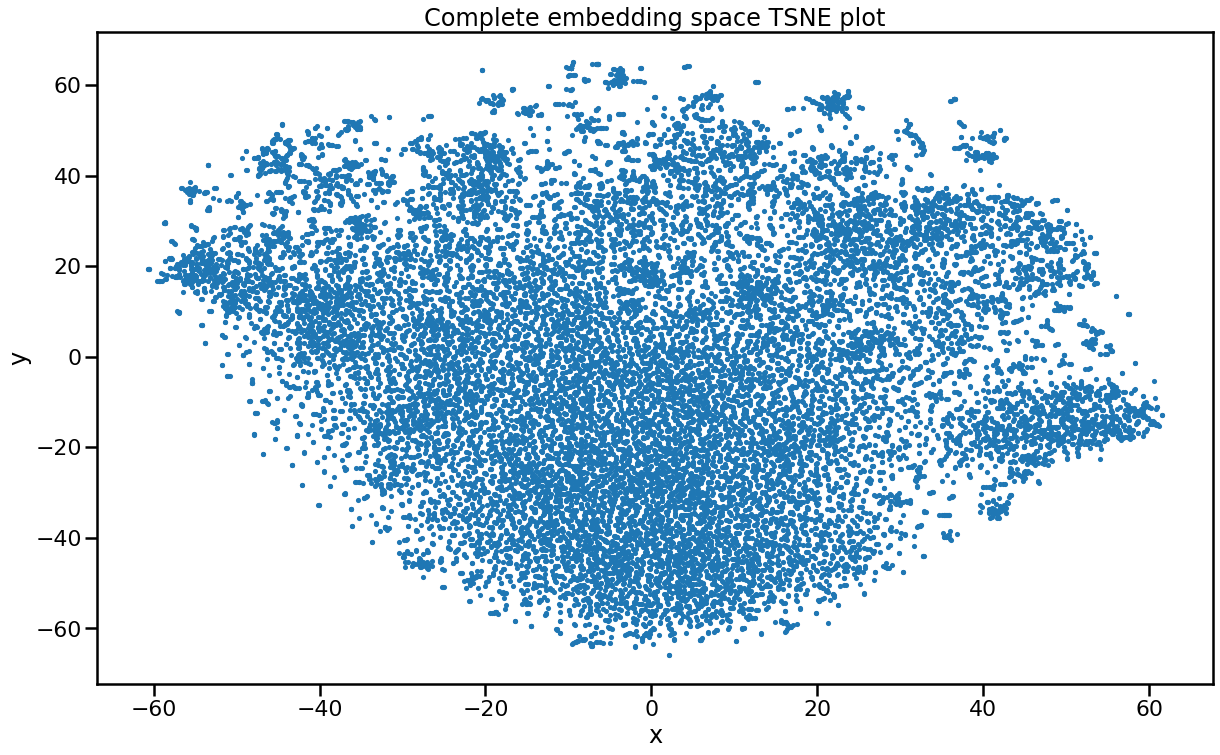

In [9]:
# tsne plot
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12), title="Complete embedding space TSNE plot")

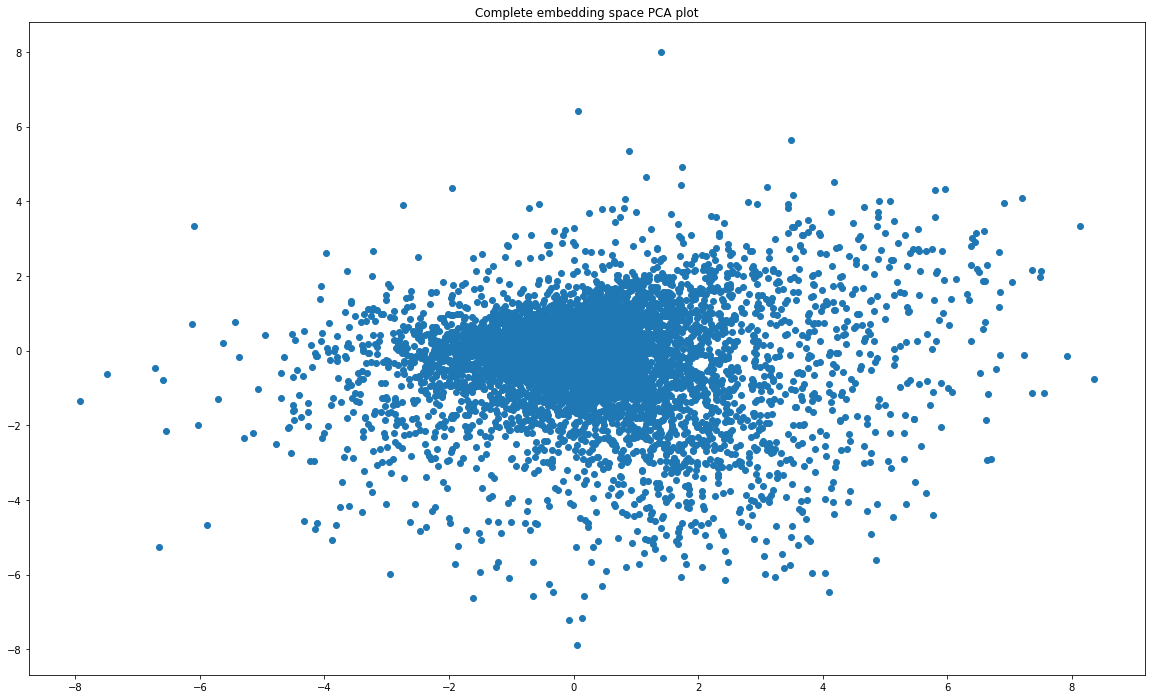

In [7]:
from sklearn.decomposition import PCA
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize=(20,12))
plt.title("Complete embedding space PCA plot")
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
plt.show()

In [10]:
# Preparing data to use for most similar TSNE plots.
keys = ['king', 'pakistan', 'majority', 'stability', 'alignment', 'post', 'civilian', 'intelligence',
'disoriented', 'murder', 'languished', 'exile', 'politics', 'bowing', 'nuclear', 'operations']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [11]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

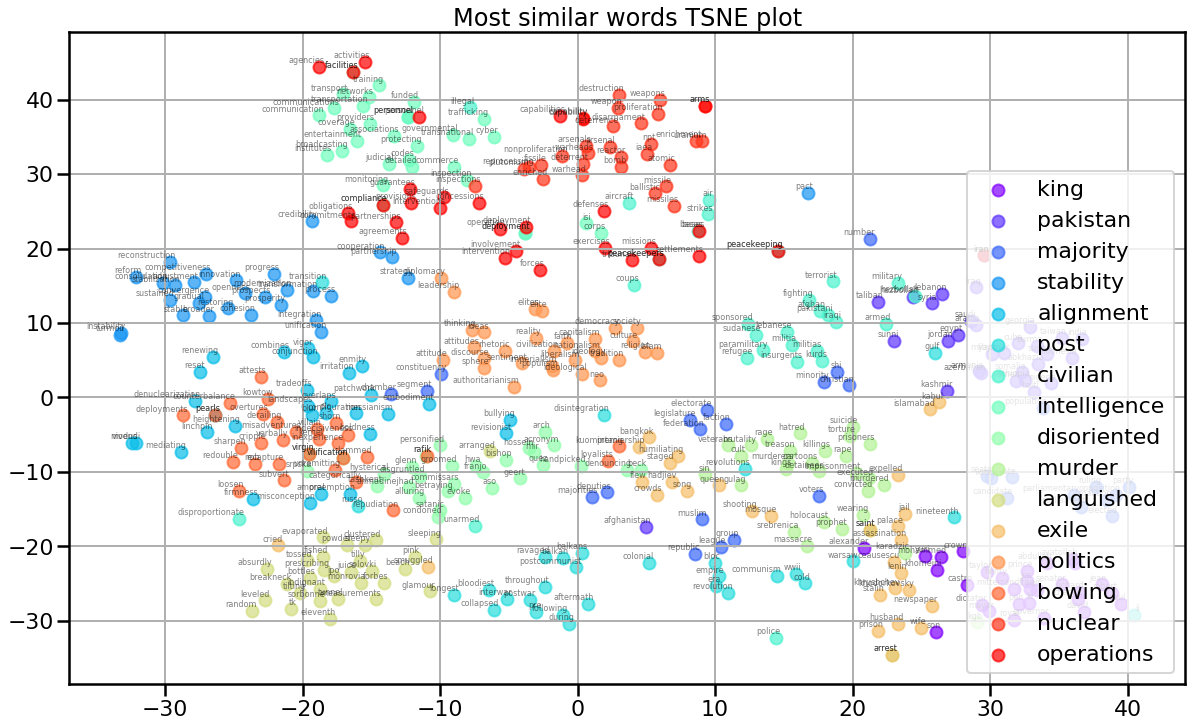

In [16]:
import matplotlib.cm as cm
%matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(20, 12))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=np.array([color]), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Most similar words TSNE plot', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_tsne_cbow.png')

In [13]:
from sklearn.decomposition import PCA
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
pca_model_en_2d = PCA(n_components=2)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

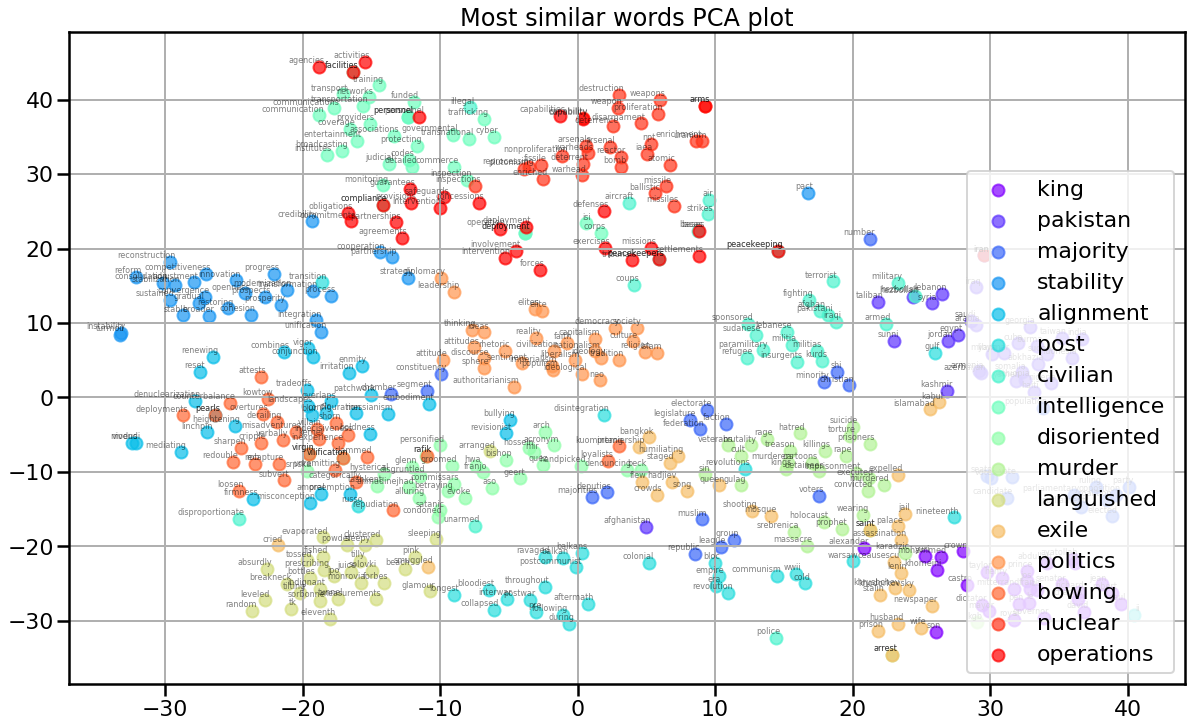

In [15]:
def pca_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(20, 12))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=np.array([color]), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


pca_plot_similar_words('Most similar words PCA plot', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_pca_cbow.png')